In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('C:/Users/admin/Desktop/210603~/210610/데이터/ratings.dat','r') as f:
    ratings = f.readlines()

In [3]:
with open('C:/Users/admin/Desktop/210603~/210610/데이터/users.dat','r') as f:
    users = f.readlines()

In [4]:
with open('C:/Users/admin/Desktop/210603~/210610/데이터/movies.dat','r', encoding = 'ISO-8859-1') as f:
    movies = f.readlines()

In [5]:
user_ls = []
rating_ls = []
movie_ls = []

In [6]:
for i in range(len(users)):
    user_ls.append(users[i][:-1].split('::'))
for i in range(len(ratings)):
    rating_ls.append(ratings[i][:-1].split('::'))
for i in range(len(movies)):
    movie_ls.append(movies[i][:-1].split('::'))

In [7]:
user_df = pd.DataFrame(user_ls)
rating_df = pd.DataFrame(rating_ls)
movie_df = pd.DataFrame(movie_ls)

In [8]:
user_df.columns = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_df.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_df.columns = ['movie_id', 'title', 'genres']

In [24]:
total = pd.merge(pd.merge(user_df, rating_df, how = 'outer'), movie_df, how = 'outer')
total

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000381,NaN,NaN,NaN,NaN,NaN,3650,NaN,NaN,Anguish (Angustia) (1986),Horror
1000382,NaN,NaN,NaN,NaN,NaN,3750,NaN,NaN,Boricua's Bond (2000),Drama
1000383,NaN,NaN,NaN,NaN,NaN,3829,NaN,NaN,Mad About Mambo (2000),Comedy|Romance
1000384,NaN,NaN,NaN,NaN,NaN,3856,NaN,NaN,Autumn Heart (1999),Drama


In [82]:
## 평점을 매기지 않은 영화들
total.tail(177) 

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
1000032,2665,M,35,11,98443,3533,1,974836472,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
1000033,2753,F,50,20,27516,3533,3,973894942,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
1000034,3546,M,25,20,41706,3533,4,968011574,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
1000035,4551,M,18,12,60622,3533,5,966879941,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
1000036,4852,M,35,0,42025,3533,3,962849834,"Actor's Revenge, An (Yukinojo Henge) (1963)",Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [83]:
## 제거
total = total.drop(total.index[1000209:])  
total

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [84]:
## rating type int로 변경
total['rating'] = total['rating'].astype(int)

# **2.영화별 성별 평점 평균을 산출하여 여성 상위/하위 10개 영화의 목록 추출 및 도식화(barplot)**

In [85]:
## 성별별로 groupby 한 영화 평점의 평균
group_se = total['rating'].groupby([total['title'],total['gender']]).mean().unstack()
group_se

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [86]:
# NAN 제거
group_se = group_se.dropna(axis=0)

In [87]:
# 여성 평점 top10
top10 = group_se.sort_values(by = 'F',ascending = False)[:10]
top10

gender,F,M
title,,
Coldblooded (1995),5.0,3.588235
"Gate of Heavenly Peace, The (1995)",5.0,5.000000
"Other Side of Sunday, The (Søndagsengler) (1996)",5.0,2.928571
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
"Big Combo, The (1955)",5.0,3.600000
Country Life (1994),5.0,2.000000
Lamerica (1994),5.0,4.666667
24 7: Twenty Four Seven (1997),5.0,3.750000
Raw Deal (1948),5.0,3.307692


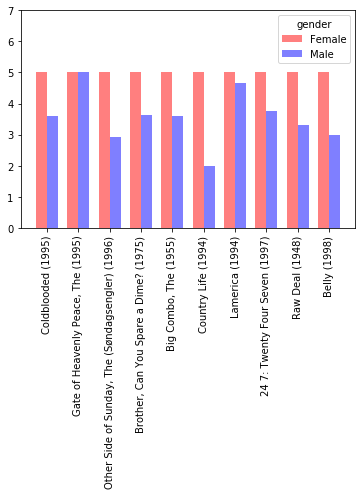

In [104]:
index = np.arange(len(top10.index))
bar_width = 0.35
alpha = 0.5
p1 = plt.bar(index - bar_width/2, top10['F'], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
p2 = plt.bar(index + bar_width/2, top10['M'], 
             bar_width, 
             color='b',
             alpha = alpha,
             label='Male')
plt.xticks(index, list(top10.index), rotation = 90)
plt.ylim(0,7)
plt.legend(title = 'gender')

In [89]:
# 하위 10개
bot10 = group_se.sort_values(by = 'F',ascending = True)[:10]
bot10

gender,F,M
title,,
Destiny Turns on the Radio (1995),1.0,2.250000
Carnosaur 3: Primal Species (1996),1.0,1.066667
Frogs for Snakes (1998),1.0,2.250000
Jamaica Inn (1939),1.0,3.142857
"Alan Smithee Film: Burn Hollywood Burn, An (1997)",1.0,2.062500
Diamonds (1999),1.0,2.625000
Big Bully (1996),1.0,2.000000
"Neon Bible, The (1995)",1.0,4.000000
My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993),1.0,2.777778


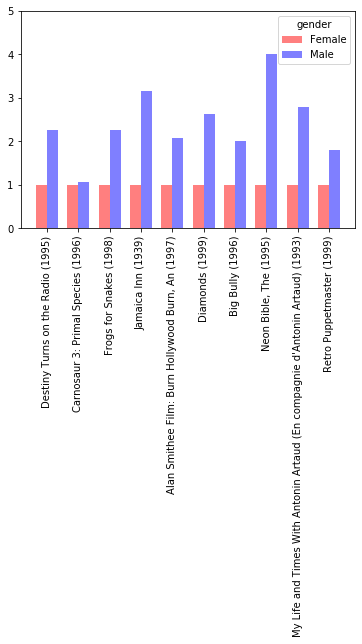

In [90]:
index = np.arange(len(bot10.index))
bar_width = 0.35
alpha = 0.5
p1 = plt.bar(index - bar_width/2, bot10['F'], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
p2 = plt.bar(index + bar_width/2, bot10['M'], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')
plt.xticks(index, list(bot10.index), rotation = 90)
plt.ylim(0,5)
plt.legend(title = 'gender')

# **3. 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화**
  
# **- 인기도는 평점으로 평가**

In [106]:
# rating 갯수가 300개 이상
rat_count = pd.DataFrame(total['rating'].groupby(total['title']).count())
rat_count[rat_count['rating'] >= 300]

,rating
title,
"'burbs, The (1989)",303
10 Things I Hate About You (1999),700
101 Dalmatians (1961),565
101 Dalmatians (1996),364
12 Angry Men (1957),616
...,...
Young Guns (1988),562
Young Guns II (1990),369
Young Sherlock Holmes (1985),379


In [107]:
rat_count[rat_count['rating'] >= 300].index

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '20,000 Leagues Under the Sea (1954)',
       '2001: A Space Odyssey (1968)', '2010 (1984)', '28 Days (2000)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1058)

In [108]:
# title을 list에 저장
top10_more300 =[]
for i in rat_count[rat_count['rating'] >= 300].index:
    top10_more300.append(i)

In [110]:
top10_300 = group_se.loc[top10_more300].sort_values(by = 'F', ascending = False).head(10)
top10_300

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248


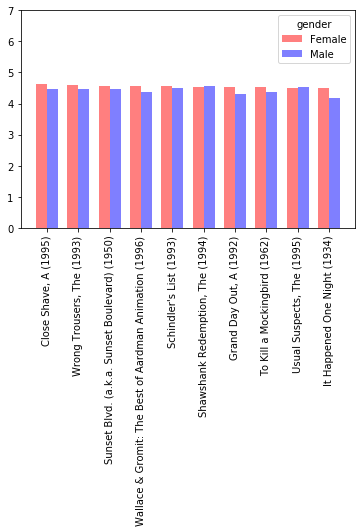

In [112]:
index = np.arange(len(top10_300.index))
bar_width = 0.35
alpha = 0.5
p1 = plt.bar(index - bar_width/2, top10_300['F'], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
p2 = plt.bar(index + bar_width/2, top10_300['M'], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')
plt.xticks(index, list(top10_300.index), rotation = 90)
plt.ylim(0,7)
plt.legend(title = 'gender')